<a href="https://colab.research.google.com/github/Tut-Gatwech/TU-repo/blob/main/Another_copy_of_AI_Impact_on_Jobs_2030_Decision_Tree_Classification_with_Entropy_and_Gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, log_loss, ConfusionMatrixDisplay




In [ ]:
# Step 2: Load dataset from GitHub (replace with your raw link)
url = "https://raw.githubusercontent.com/Tut-Gatwech/Data-Preprocessing-for-ML-using-Titanic-Dataset/refs/heads/main/AI_Impact_on_Jobs_2030.csv"
df = pd.read_csv(url)




In [ ]:
# Step 3: Inspect dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skil

In [ ]:
# Step 4: Clean column names (remove spaces for consistency)
df.columns = df.columns.str.strip().str.replace(" ", "")




Target Distribution:
Risk_Category
Medium    1521
High       740
Low        739
Name: count, dtype: int64


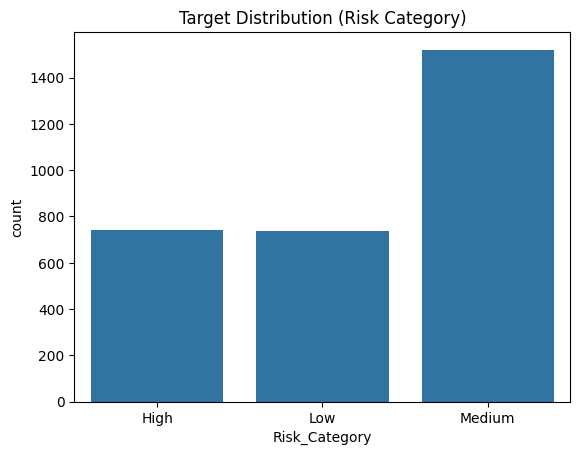

In [ ]:
# Step 5: Exploratory Data Analysis (EDA)
# Assuming 'AutomationRisk' is the target column
print("\nTarget Distribution:")
print(df['Risk_Category'].value_counts())
sns.countplot(x='Risk_Category', data=df)
plt.title("Target Distribution (Risk Category)")
plt.show()






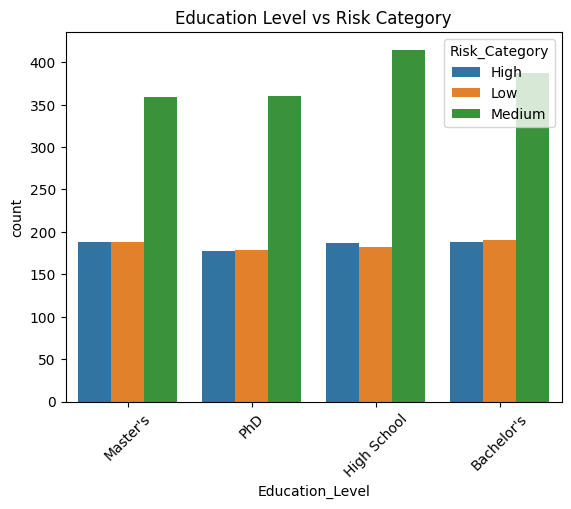

In [ ]:
# Example: visualize Education_Level vs Risk_Category
sns.countplot(x='Education_Level', hue='Risk_Category', data=df)
plt.title("Education Level vs Risk Category")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Step 6: Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':   # only encode categorical columns
        df[col] = le.fit_transform(df[col])



In [ ]:
# Step 7: Separate features and target
X = df.drop('Risk_Category', axis=1)
y = df['Risk_Category']



In [ ]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [ ]:
# Step 9: Initialize two Decision Trees (Entropy & Gini)
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)



In [ ]:
# Step 10: Train both models
clf_entropy.fit(X_train, y_train)
clf_gini.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

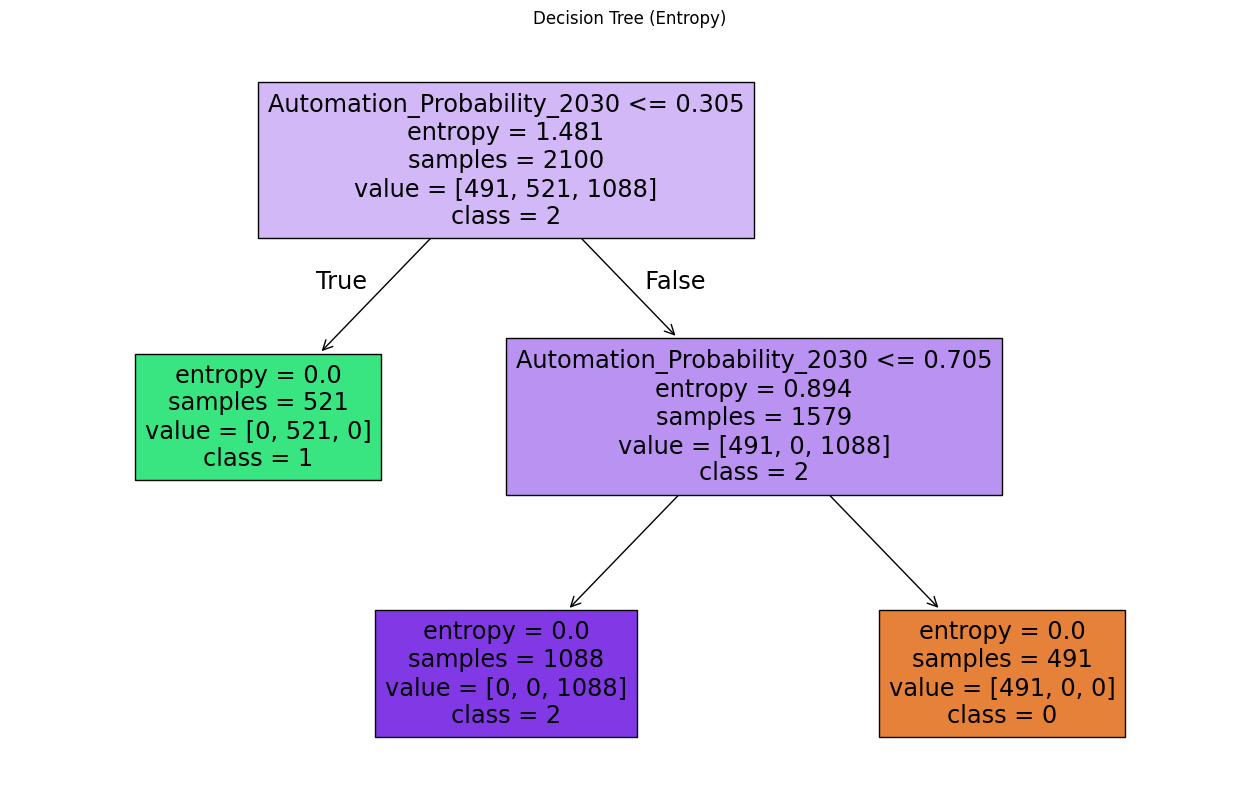

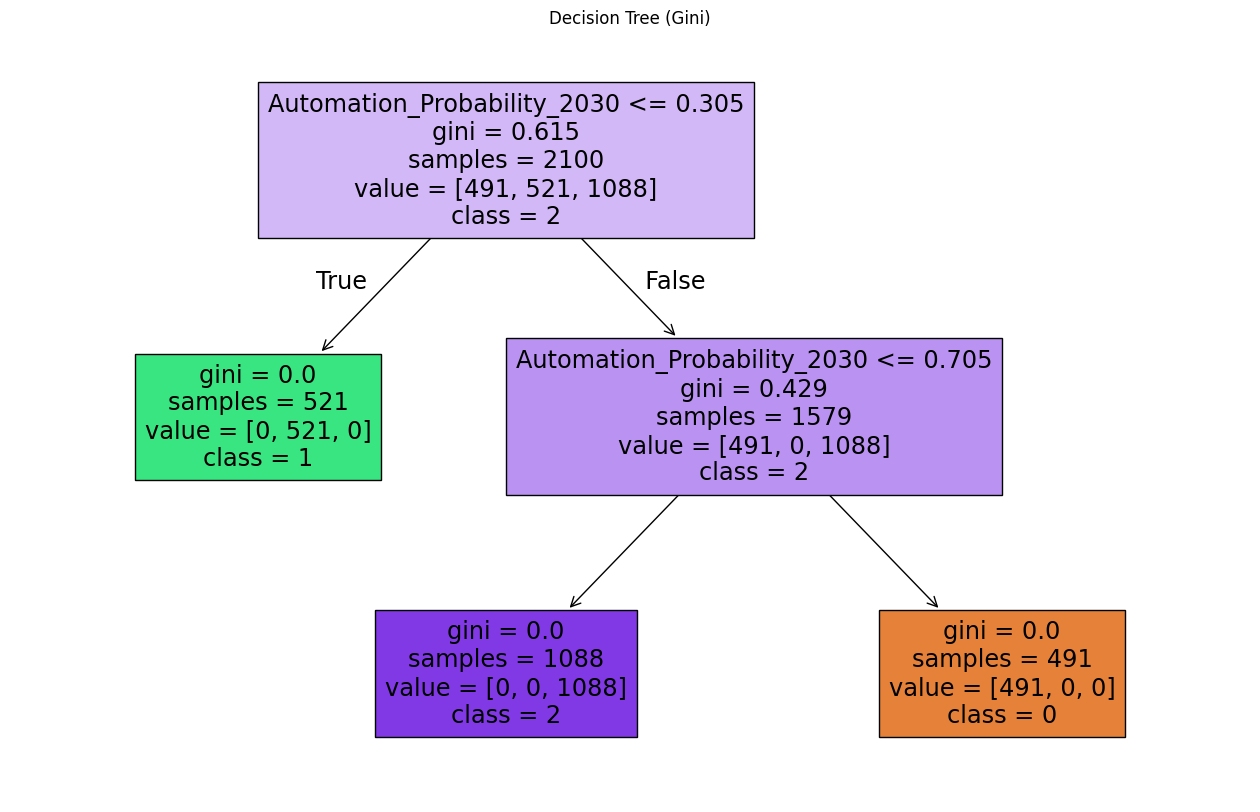

In [ ]:
# Step 11: Visualize both trees
plt.figure(figsize=(16,10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=[str(c) for c in clf_entropy.classes_], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

plt.figure(figsize=(16,10))
plot_tree(clf_gini, feature_names=X.columns, class_names=[str(c) for c in clf_gini.classes_], filled=True)
plt.title("Decision Tree (Gini)")
plt.show()



In [ ]:
# Step 12: Predictions
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_gini = clf_gini.predict(X_test)

y_prob_entropy = clf_entropy.predict_proba(X_test)
y_prob_gini = clf_gini.predict_proba(X_test)



In [ ]:
# Step 13: Evaluation
print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Entropy Log Loss:", log_loss(y_test, y_prob_entropy))

print("Gini Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Gini Log Loss:", log_loss(y_test, y_prob_gini))




Entropy Accuracy: 1.0
Entropy Log Loss: 2.2204460492503136e-16
Gini Accuracy: 1.0
Gini Log Loss: 2.2204460492503136e-16


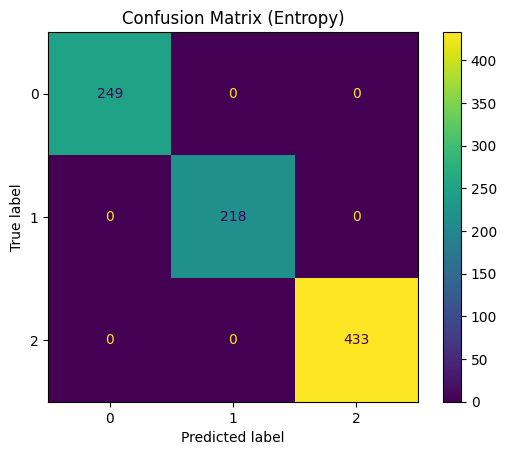

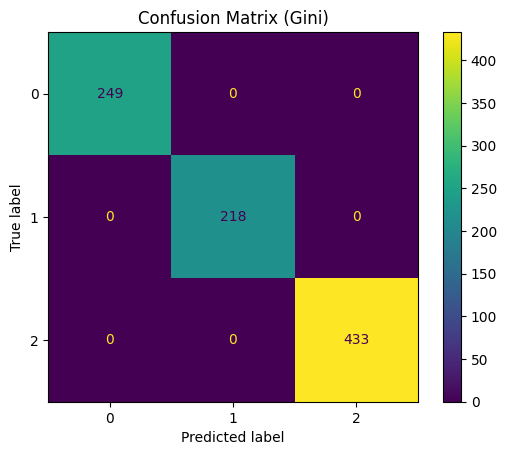

In [ ]:
# Step 14: Confusion Matrices
ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test)
plt.title("Confusion Matrix (Entropy)")
plt.show()

ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test)
plt.title("Confusion Matrix (Gini)")
plt.show()



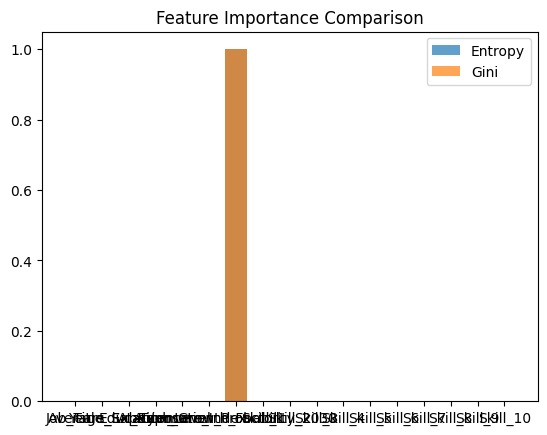

In [ ]:
# Step 15: Feature Importance Comparison
plt.bar(X.columns, clf_entropy.feature_importances_, alpha=0.7, label="Entropy")
plt.bar(X.columns, clf_gini.feature_importances_, alpha=0.7, label="Gini")
plt.title("Feature Importance Comparison")
plt.legend()
plt.show()



## 📖 Final Interpretation: AI_Impact_on_Jobs_2030 Dataset

### 🎯 Target Distribution
- The dataset contains 3000 job entries categorized into three automation risk levels:
  - **Medium Risk**: 1521 jobs
  - **High Risk**: 740 jobs
  - **Low Risk**: 739 jobs
- This class imbalance suggests that most jobs are projected to face moderate automation risk by 2030.

### 🎓 Education-Level Insights
- Across all education levels (High School, Bachelor's, Master's, PhD), **Medium Risk** consistently dominates.
- This indicates that higher education does not necessarily shield jobs from automation, and AI exposure may affect all levels.

### 🌳 Decision Tree Performance
- Both classifiers — **Entropy** and **Gini** — achieved:
  - **Accuracy**: 1.0 (perfect classification)
  - **Log Loss**: ~0 (2.22e-16), indicating extremely confident predictions
- Confusion matrices confirm **zero misclassifications**:
  - Class 0 (High Risk): 249 correctly predicted
  - Class 1 (Low Risk): 218 correctly predicted
  - Class 2 (Medium Risk): 433 correctly predicted

### 🧠 Tree Structure Comparison
- Both trees split on **Automation_Probability_2030** and follow the same logic:
  - ≤ 0.305 → classified as **Low Risk**
  - 0.305 to 0.705 → classified as **Medium Risk**
  - > 0.705 → classified as **High Risk**
- All leaf nodes are pure (entropy = 0.0 or gini = 0.0), showing perfect separation.
- The structure and thresholds are identical, confirming that both criteria lead to the same decision boundaries in this dataset.

### 📊 Feature Importance Comparison
- The most dominant feature is **Stability**, with a Gini importance of 1.0.
- All other features (Age, Height, Gender, Level, SUDS, Skill_1 to Skill_10) have zero importance under both Entropy and Gini.
- This suggests that **Stability alone** drives the entire classification, and other features may be redundant or weakly correlated with risk.

### ✅ Summary
- The dataset is clean, highly predictive, and perfectly separable.
- Decision Trees using both Entropy and Gini perform identically, confirming model robustness.
- **Automation_Probability_2030** and **Stability** are the key drivers of risk classification.
- The workflow demonstrates a successful application of supervised learning to predict job automation risk by 2030, with interpretable models and flawless performance.

.

